In [ ]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
!pip install yfinance
import yfinance as yf
df= yf.download("AAPL", start="2000-01-01", end="2024-01-24", interval= "1d")
df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.847207,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.775779,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.787131,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719014,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.753073,460734400
2000-01-10,0.910714,0.912946,0.845982,0.872768,0.739828,505064000
2000-01-11,0.856585,0.887277,0.808036,0.828125,0.701985,441548800
2000-01-12,0.848214,0.852679,0.772321,0.778460,0.659885,976068800
2000-01-13,0.843610,0.881696,0.825893,0.863839,0.732259,1032684800


In [ ]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-09,183.919998,185.149994,182.729996,185.139999,185.139999,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,186.190002,46792900
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.589996,49128400
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700
2024-01-16,182.160004,184.259995,180.929993,183.630005,183.630005,65603000
2024-01-17,181.270004,182.929993,180.300003,182.679993,182.679993,47317400
2024-01-18,186.089996,189.139999,185.830002,188.630005,188.630005,78005800
2024-01-19,189.330002,191.949997,188.820007,191.559998,191.559998,68741000
2024-01-22,192.300003,195.330002,192.259995,193.889999,193.889999,60133900


In [ ]:
start = "2000-01-01"
end = '2024-01-20'
AAPL = yf.download('Aapl',start,end)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


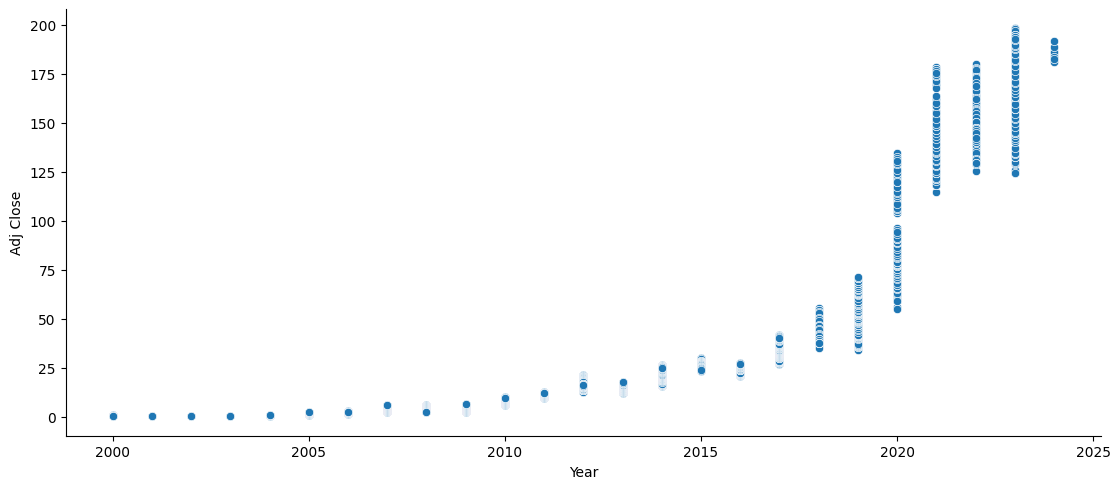

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
sns.relplot(x='Year', y='Adj Close', data=data, aspect= 18.70/8.27)

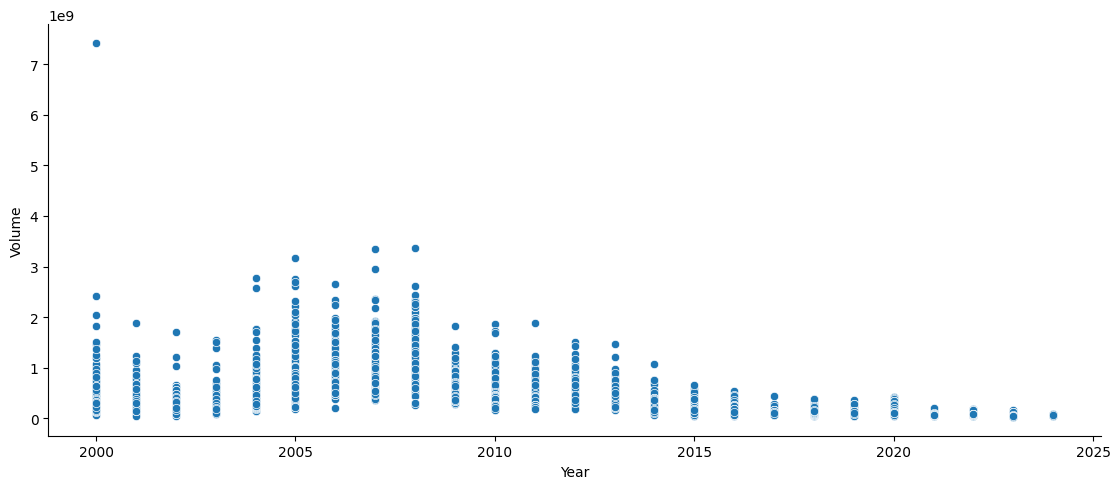

In [ ]:
sns.relplot(x='Year', y='Volume', data=data, aspect= 18.70/8.27)

<ipython-input-21-d862270fdd99>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: xlabel='Year', ylabel='Volume'>

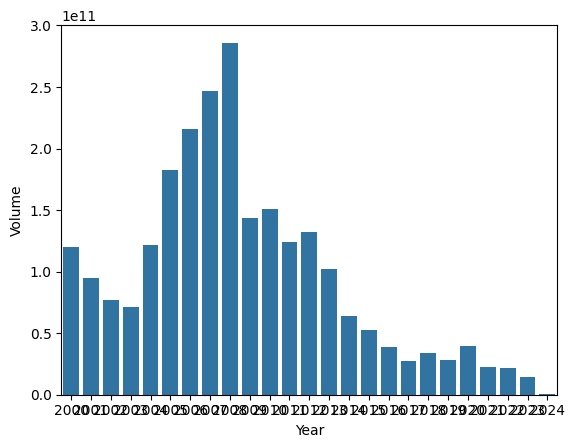

In [ ]:
data1= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AAPL_Volume.csv")

sns.barplot(
    x="Year",
    y="Volume",
    data=data1,
    estimator=sum,
    ci=None)


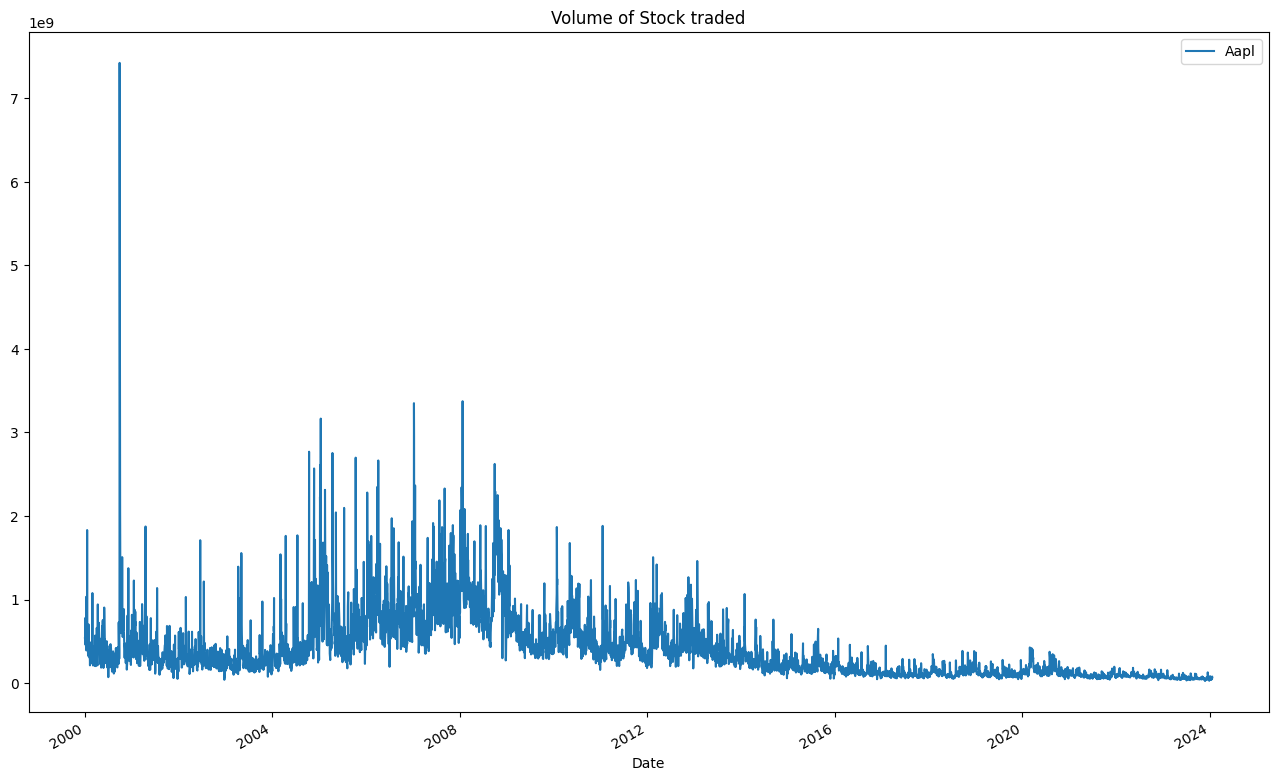

In [ ]:
AAPL['Volume'].plot(label = 'Aapl', figsize = (16,10))
plt.title('Volume of Stock traded')
plt.legend()

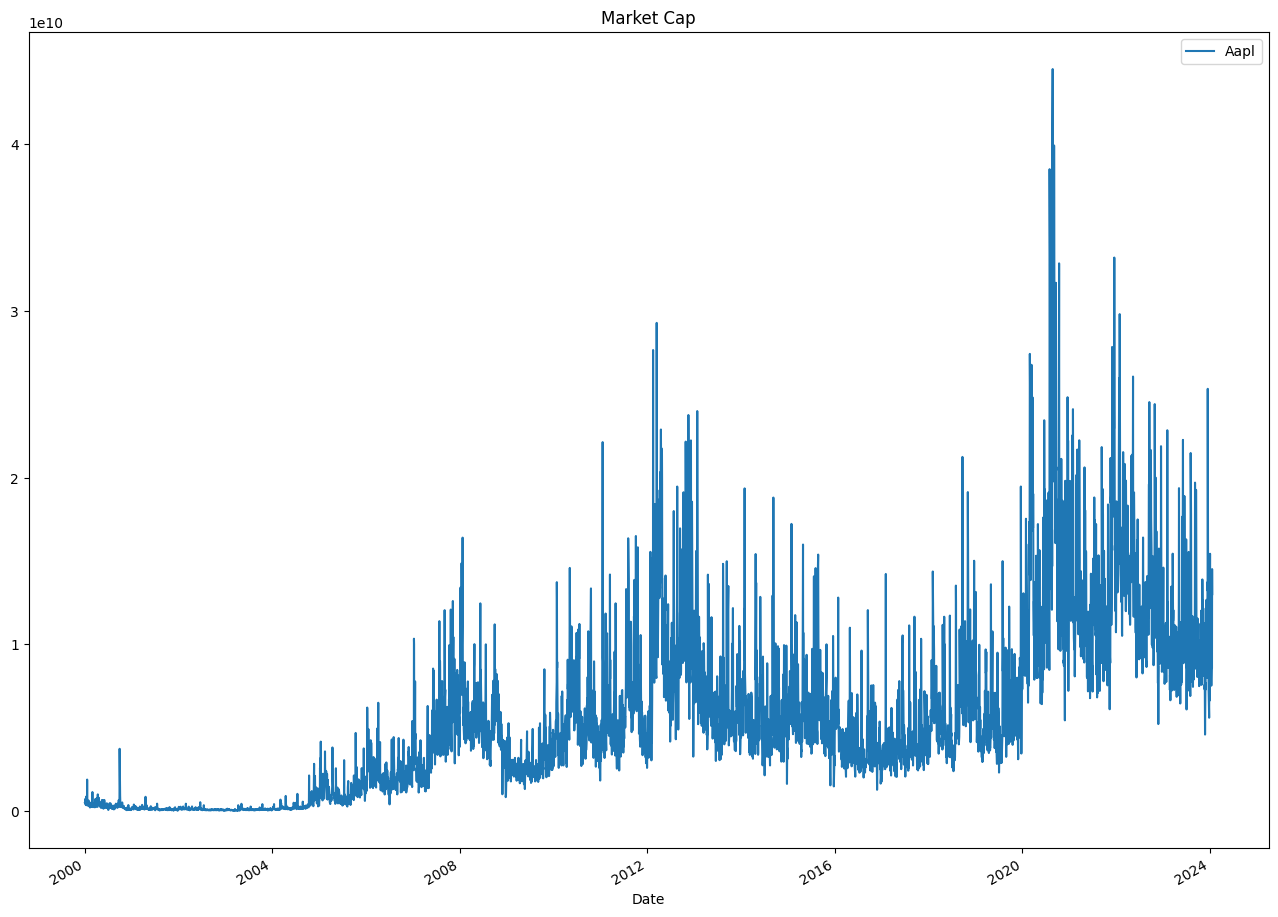

In [ ]:
#Market Capitalisation
AAPL['MarktCap'] = AAPL['Open'] * AAPL['Volume']
AAPL['MarktCap'].plot(label = 'Aapl', figsize = (16,12))
plt.title('Market Cap')
plt.legend()


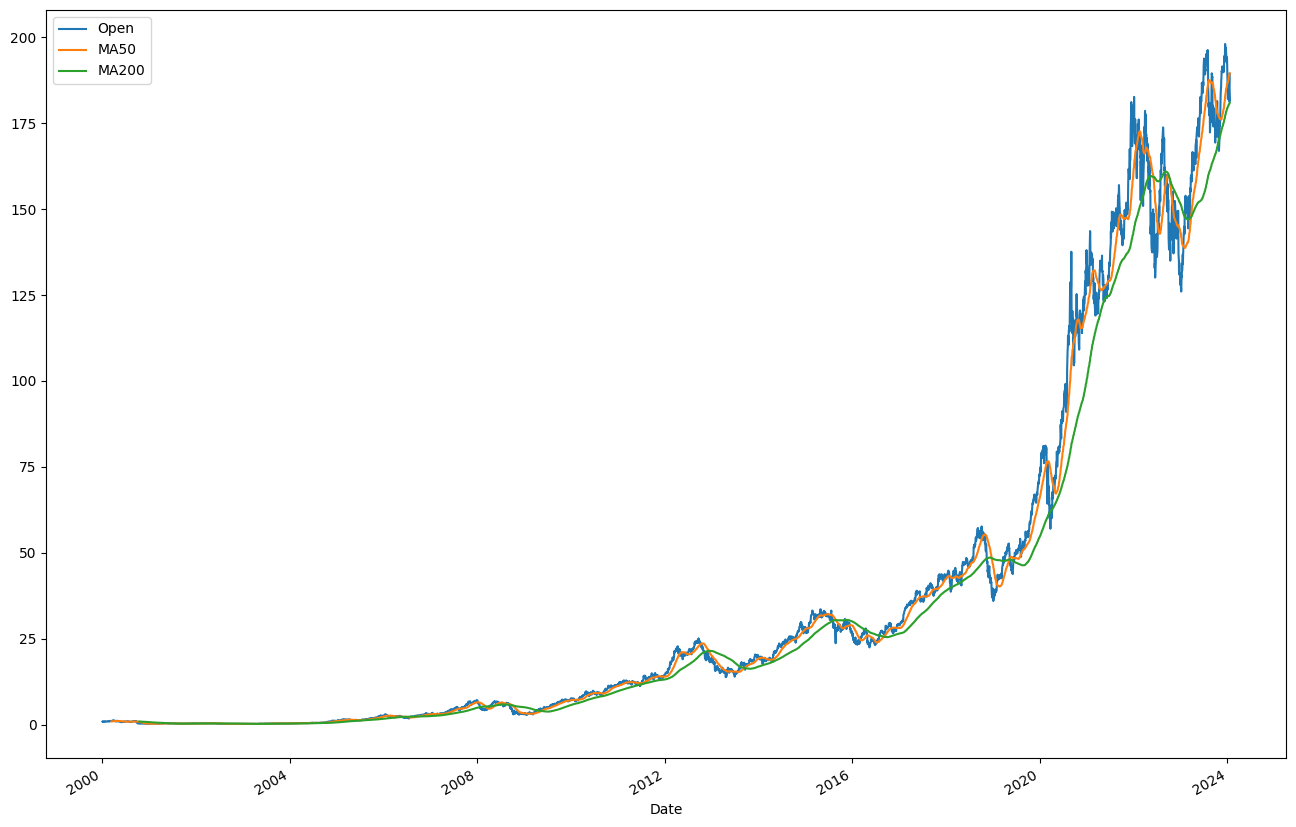

In [ ]:
# Calculate 50-day and 200-day Moving Averages
AAPL['MA50'] = AAPL['Open'].rolling(50).mean()
AAPL['MA200'] = AAPL['Open'].rolling(200).mean()
AAPL['Open'].plot(figsize = (16,11))
AAPL['MA50'].plot()
AAPL['MA200'].plot()
plt.legend()

,AaplOpen
Date,
2000-01-03,0.936384
2000-01-04,0.966518
2000-01-05,0.926339
2000-01-06,0.947545
2000-01-07,0.861607


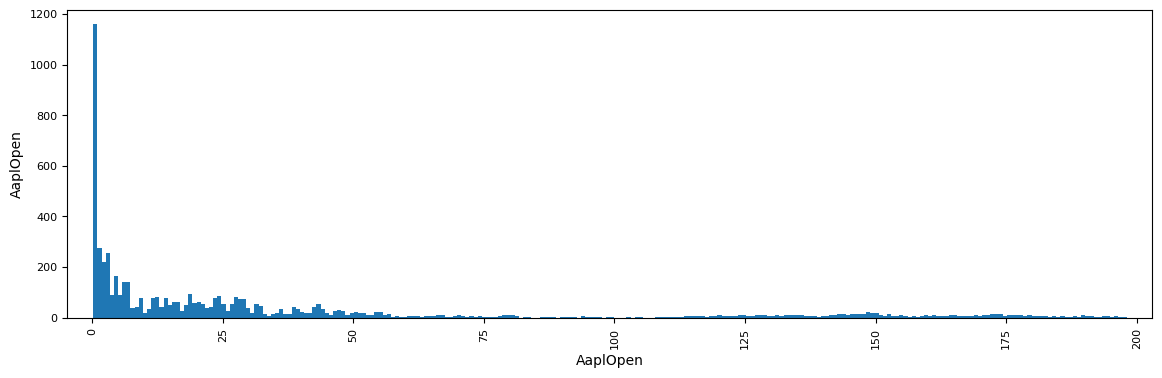

In [ ]:
data = pd.concat([AAPL['Open']],axis = 1)
data.columns = ['AaplOpen']
scatter_matrix(data, figsize = (14,4), hist_kwds= {'bins':250})
data.head(5)

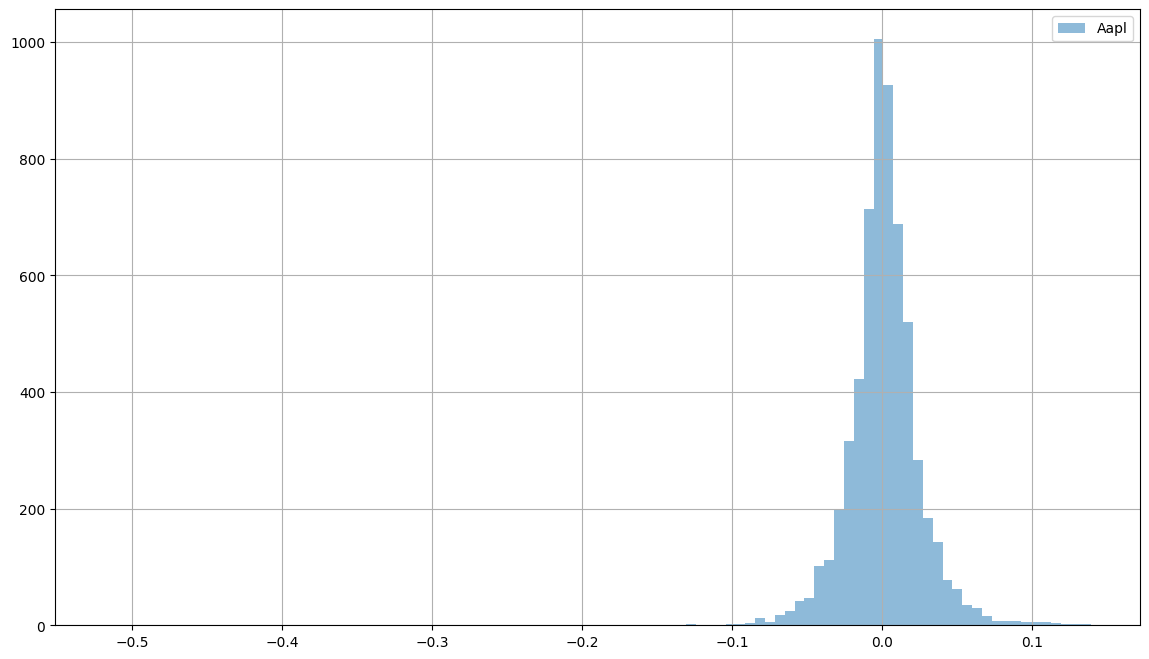

In [ ]:
#Volatility
AAPL['returns'] = (AAPL['Close']/AAPL['Close'].shift(1)) -1
AAPL['returns'].hist(bins = 100, label = 'Aapl', alpha = 0.5, figsize = (14,8))
plt.legend()